# Aula

## Importanções e carregamento do dataset

In [ ]:
!pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier

In [ ]:
heart_data = pd.read_csv('/content/drive/MyDrive/Universidade de dados/Semana 6/heart_failure_clinical_records_dataset.csv')
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


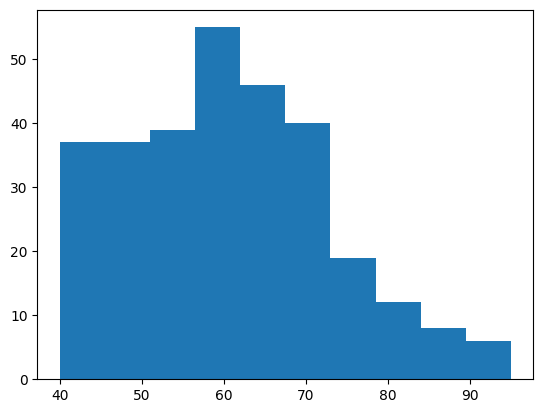

In [ ]:
_ = plt.hist(heart_data.age)
_ = plt.show()

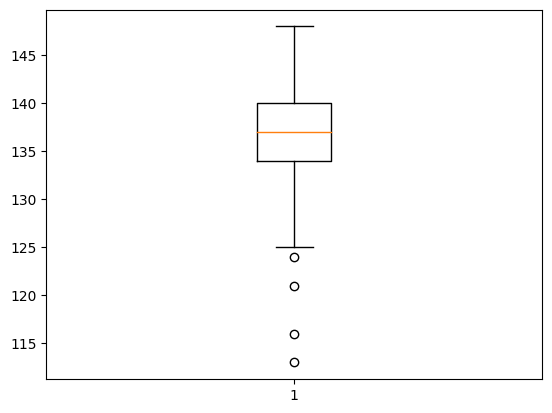

In [ ]:
_ = plt.boxplot(heart_data.serum_sodium)
_ = plt.show()

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
heart_data.nunique().sort_values(ascending=False)

creatinine_phosphokinase    208
platelets                   176
time                        148
age                          47
serum_creatinine             40
serum_sodium                 27
ejection_fraction            17
anaemia                       2
diabetes                      2
high_blood_pressure           2
sex                           2
smoking                       2
DEATH_EVENT                   2
dtype: int64

Se voce tivesse muitas colunas e tivesse que definir arbitrariamente um numero maximo de valores unicos que determina se aquela feature é categorica(para um possivel encoding), voce poderia selecionar as features da seguinte forma:

features_categoricas = df.iloc[:, df.nunique() < N].columns

O codigo acima determina que todas as colunas com menos de N valores unicos são categoricas.

É interessante fazer dessa forma pois as vezes temos datasets com 500 colunas que não da pra olhar uma a uma para ver se ela é ou não categorica

No nosso caso, as features categoricas sao dummiers(o ou 1) sendo assim, podemos tratá-las como numericas, entao nao precisamos converter

In [ ]:
# Vamos trqansformar a coluna diabetes em categorica so para exemplificação de encoder
heart_data['diabetes'] = heart_data['diabetes'].map({1: 'yes', 0: 'no'})
heart_data.sample(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
208,60.0,1,2281,yes,40,0,283000.0,1.0,141,0,0,187,0


## Modelo de machine learning

In [ ]:
heart_data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
target = 'DEATH_EVENT'

In [ ]:
X = heart_data[features]
y = heart_data[target]

Train test split é feito antes de encoderds, scaler, etc, ...

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((239, 12), (239,))

In [ ]:
categorical_feature = ['diabetes']
numerical_features = ['age', 'anaemia', 'creatinine_phosphokinase',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']

Aproveitando, imagine que voce tivesse outras duas variaveis
- Variavel 1: classe social, valores que ela recebe: 1,2,3,4,5.
- Variavel 2: Estado, recebe: SP, RJ, DF.

Duas coisas, vale pontuar:
- A variavel 1, **apesar de ser em formato numerico, ainda precisa ser tratada como categorica,** uma vez que se tratessemos como numerica, estaremos dizendo que a classe 1 tem 4 de distancia da classe 5, o que é um equivoco, elas apensas tem valores diferentes, **não existindo uma ordenação**
- Para há variavel 2, é importante ressaltar que não faz muito sentido usar ordinal encoder, pois cairiamos no mesmo prblema da variavel 1, **estariamos colocando uma ordem em uma coluna que apensas possui valores diferentes, pois não existe uma ordenação nessa coluna**


Transformando coluna

```
transformer = ColumnTransformer([
    ('Nome Transformação', Transformação_a_ser_feita, Colunas_afetadas),
    ('Nome Transformação1', Transformação_a_ser_feita1, Colunas_afetadas1),
    .
    .
    .
])
transformer.fit_transform(X_train)
transformer.transform(X_test)
```



In [ ]:
categorical_pipe = Pipeline([ # vamos fazer um pipeline de encoders para aplicar mais de um tipo
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', ce.TargetEncoder()),
    # Poderíamos colocar outros tipos de encoder, como polinomial, etc
])

transformer = ColumnTransformer([
    ('categorical_transformer', categorical_pipe , categorical_feature),
    ('numerical_transformer', SimpleImputer(strategy='median'), numerical_features)
])

X_train_transformed = transformer.fit_transform(X_train, y_train) # Precisamos passar o y_train por estarmos fazendo target encoder
# Nos treinamos com X_train para que os dados no X_test sejam preenchidos com os valores do X_train, para que o modelo nao tenha dados do X_test previamente
X_test_transformed = transformer.transform(X_test)


In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [ ]:
predicao = tree.predict(X_test_transformed)
predicao

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

Chegou um dataset novo, qual é o passo a passo para prever?


```
novos_clientes = pd.read_csv('novos_clientes.csv')

# Filtrar as colunas
novos_clientes_2 = novos_clientes[features]

# Pre-processamentos das colunas
transformer.transform(novos_clientes_2)

predicao = tree.predict(novos_clientes_2)
```



In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

print(f'acuracia: {accuracy_score(predicao, y_test):.2f}')
print(f'Recall: {recall_score(predicao, y_test):.2f}')
print(f'Precision: {precision_score(predicao, y_test):.2f}')
print(f'F1: {f1_score(predicao, y_test):.2f}')
print(f'ROC/AUC: {roc_auc_score(predicao, y_test):.2f}')

acuracia: 0.68
Recall: 0.67
Precision: 0.48
F1: 0.56
ROC/AUC: 0.68


Precision = TP / (TP+FP)

Recall = TP / (TP+FN)

# Desafio

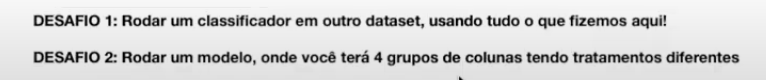

Vamos usar a base de dados do titanic


In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/Universidade de dados/Semana 6/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
features = ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']
target = 'Survived'

X = titanic[features]
y = titanic[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
colunas_numericas = ['Age', 'SibSp','Parch', 'Fare'] # Testar Pclass como numerica(talvez tenha uma ordenação)
colunas_categoricas_ordinal = ['Pclass', 'Sex'] # Vão ser as colunas que possuem uma ordenação ou que são dummiers(0 ou 1)
colunas_categoricas_nominal = ['Cabin', 'Embarked'] # São aquelas que não possuem uma ordenação nas classes, não podemos usar ordinal encoder

# Vamos criar o pipeline de cada encoding para cada lista de colunas
ordinal_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # substituindo valores nulos pela moda
    ('encoder', ce.OrdinalEncoder())
])

nominal_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # substituindo valores nulos pela moda
    ('encoder', ce.OneHotEncoder())
])

# Transformando as colunas através do pipeline feito acima
transformer = ColumnTransformer([
    ('ordinal_transformer', ordinal_pipe, colunas_categoricas_ordinal),
    ('nominal_transformer', nominal_pipe, colunas_categoricas_nominal),
    ('numerical_trasformer', SimpleImputer(strategy='median'), colunas_numericas)
])

# Aplicando os encoder na base de dados de treino e apos nas de teste
X_train_transformed = transformer.fit_transform(X_train, y_train)
X_test_transformed = transformer.transform(X_test)

In [ ]:
# Testando
tree = DecisionTreeClassifier()
tree.fit(X_train_transformed, y_train)
predicao = tree.predict(X_test_transformed)

print(f'acuracia: {accuracy_score(predicao, y_test):.2f}')
print(f'Recall: {recall_score(predicao, y_test):.2f}')
print(f'Precision: {precision_score(predicao, y_test):.2f}')
print(f'F1: {f1_score(predicao, y_test):.2f}')
print(f'ROC/AUC: {roc_auc_score(predicao, y_test):.2f}')

acuracia: 0.78
Recall: 0.73
Precision: 0.73
F1: 0.73
ROC/AUC: 0.77
